# *Analysis 9: Player Valuations*

PlayerValuations contains information about **market values** of players.
Let's visualize the first rows of the table.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(0, '../')

In [2]:
df= pd.read_csv('../Datasets/player_valuations.csv')

df.head()

,player_id,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,3132,2013,2003-12-09 00:00:00,2003-12-09,2003-12-08,400000,1,126,TR1
1,6893,2012,2003-12-15 00:00:00,2003-12-15,2003-12-15,900000,1,984,GB1
2,10,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,7000000,1,398,IT1
3,26,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,1500000,1,16,L1
4,65,2015,2004-10-04 00:00:00,2004-10-04,2004-10-04,8000000,1,1091,GR1


So, the data represented by the columns are as follows:
- **player_id**: Unique identifier for the player. Used to distinguish each player as a unique entry.
- **last_season**: The last season in which the player participated.
- **datetime**: Date and time when the event related to the player was recorded.
- **date**: Date when the event related to the player was recorded (without the time).
- **dateweek**: Week of the date when the event related to the player was recorded.
- **market_value_in_eur**: Current market value of the player in euros.
- **n**: Number of events recorded for that player (in this context, it seems to always be 1).
- **current_club_id**: Unique identifier of the player's current club.
- **player_club_domestic_competition_id**: Identifier of the domestic competition of the player's current club.


In [3]:
print('Numero di righe e colonne:', df.shape)

Numero di righe e colonne: (440663, 9)


**Handling** of null values is **not necessary** in this case, as there are no null values in the columns of interest.


In [4]:
df.isnull().sum()

player_id                              0
last_season                            0
datetime                               0
date                                   0
dateweek                               0
market_value_in_eur                    0
n                                      0
current_club_id                        0
player_club_domestic_competition_id    0
dtype: int64

Create a **histogram** and a **KDE** to visualize the **distribution** of **players' market values**.

- **Histogram**: Shows the **distribution** of **market values** of **players**, allowing us to identify the **frequency** of different value ranges.
- **Kernel Density Estimate (KDE)**: Provides a **continuous** representation of the **market value distribution**, highlighting **trends** and **peaks** in the **density** of **values**.


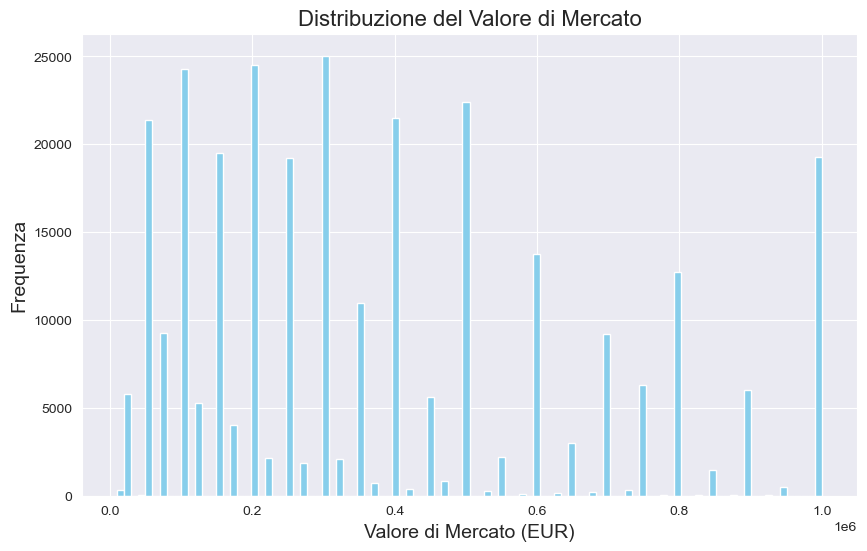

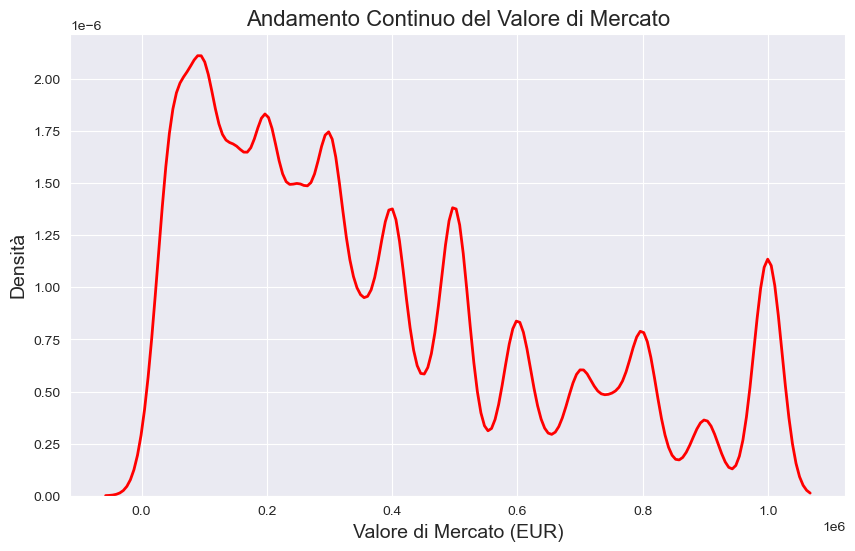

In [5]:
from Utils.PlayerValuationsUtils import plot_market_value_histogram, plot_market_value_kde
plot_market_value_histogram(df)

plot_market_value_kde(df)

An additional useful analysis is to **examine** the **temporal trend** of **players' market values** using a **line chart**.

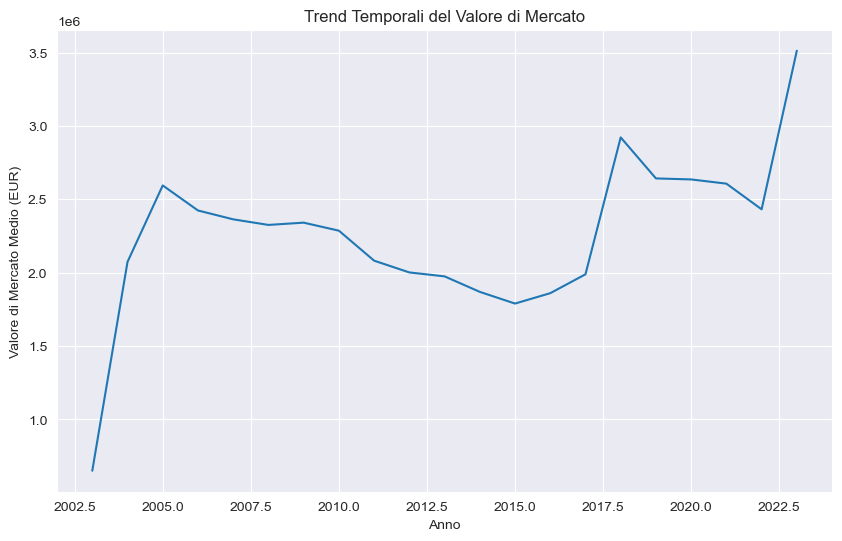

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])

df.groupby(df['datetime'].dt.year)['market_value_in_eur'].mean().plot(figsize=(10, 6))
plt.title('Trend Temporali del Valore di Mercato')
plt.xlabel('Anno')
plt.ylabel('Valore di Mercato Medio (EUR)')
plt.show()

To complete the above chart, we can use a box plot to see the full distribution of market values for each year: this allows us to visualize the median, quartiles, and outliers more clearly.


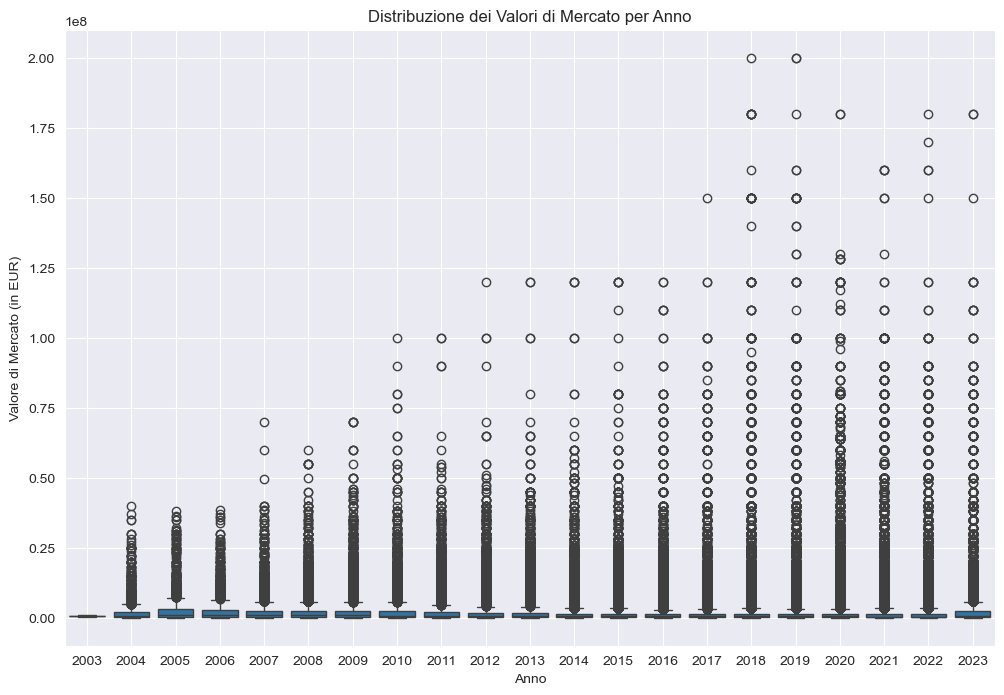

In [7]:
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year

plt.figure(figsize=(12, 8))  

sns.boxplot(x='year', y='market_value_in_eur', data=df)  
plt.title('Distribuzione dei Valori di Mercato per Anno')
plt.xlabel('Anno')
plt.ylabel('Valore di Mercato (in EUR)')
plt.grid(True) 
plt.show()

**Players** are part of the **competitions** shown in the **pie chart** below. This helps to understand if the **data studied** are distributed **evenly** among the different **competitions** or if some **competitions** have a significantly larger number of **players** compared to others.


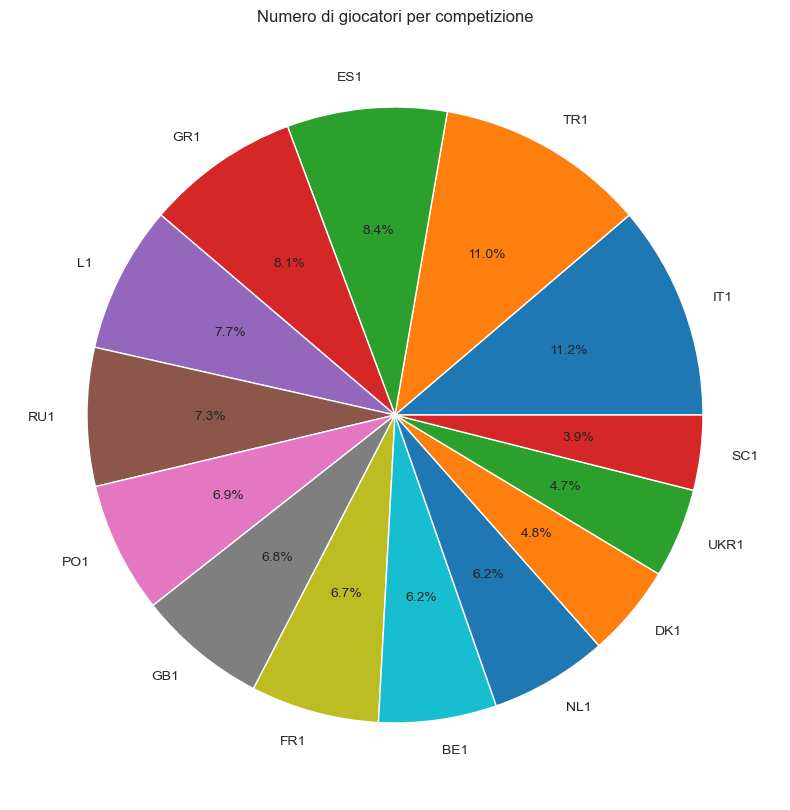

In [8]:
players_per_competition = df['player_club_domestic_competition_id'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(players_per_competition, labels = players_per_competition.index, autopct='%1.1f%%')
plt.title('Numero di giocatori per competizione')
plt.show()

We can also, using the data in the dataset, determine which **clubs** have the highest **average market value**.
This allows us to understand which clubs have the **most expensive players** on average.

A **join** is performed between the player market value dataset and the club dataset to obtain the **club names**.


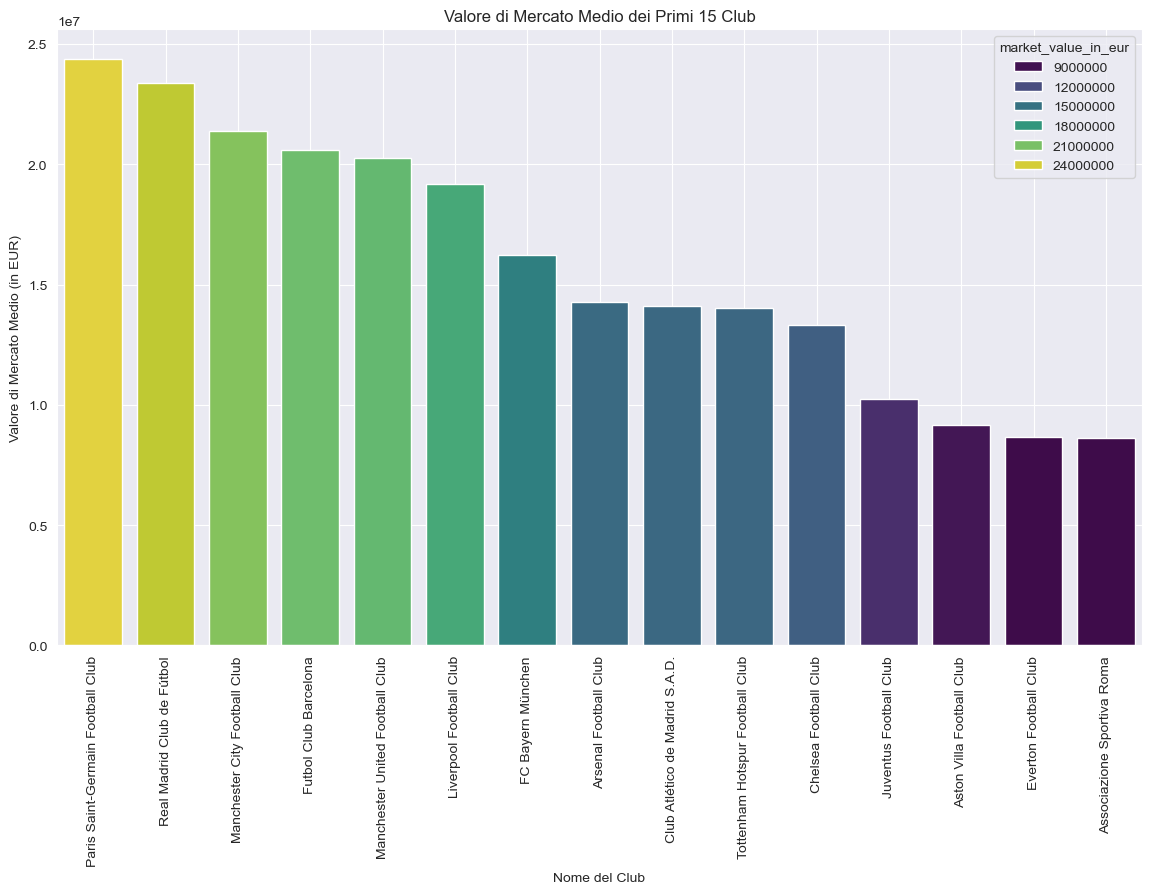

In [9]:
from Utils.PlayerValuationsUtils import calculate_average_market_values, merge_with_club_names, plot_top_15_clubs_market_value

top_15_clubs_df = calculate_average_market_values(df)

top_15_clubs_df = merge_with_club_names(top_15_clubs_df)

plot_top_15_clubs_market_value(top_15_clubs_df)

plt.show()

A **scatter plot** is used to visualize the **average market value** of **players** by **competition**. This allows us to compare the average market values of players across different competitions and identify any trends or significant differences.
Analyzing the chart, we notice that the competition GB1 has the highest average market value, followed by ES1 and FR1.


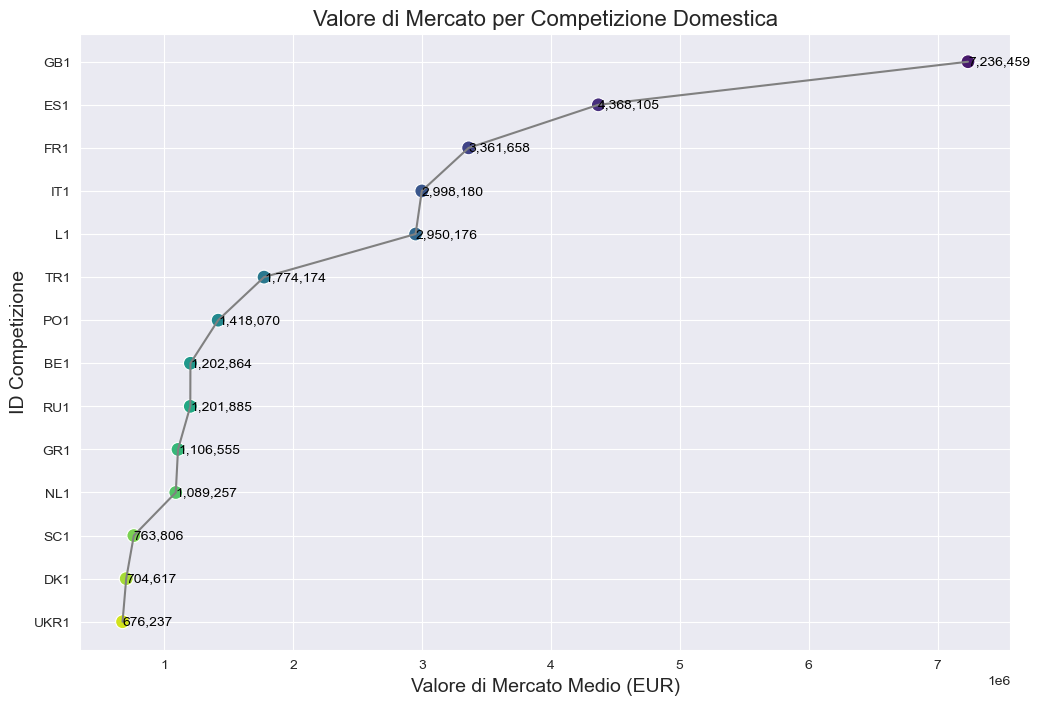

In [10]:
from  Utils.PlayerValuationsUtils import calculate_competition_market_values, plot_competition_market_values
competition_market_values = calculate_competition_market_values(df)

plot_competition_market_values(competition_market_values)

plt.show()

Finally, create a **violin plot** to visualize the **distribution** of **players' market values** after applying a **logarithmic transformation** to the data.

The **logarithmic transformation** is applied to **reduce the data scale** and better manage the wide range of market values, making the data **distribution** more **normal**.

Also, calculate the **first quartile (Q1)**, **third quartile (Q3)**, and **median (Q2)**.


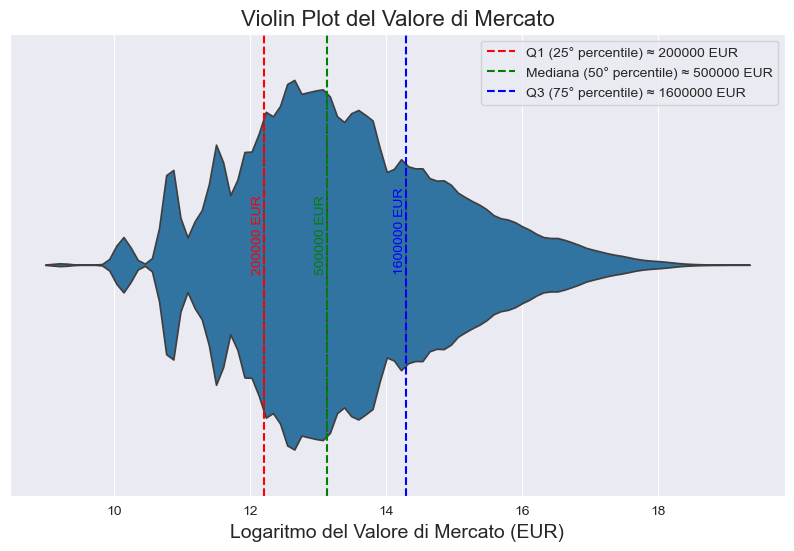

In [11]:
from Utils.PlayerValuationsUtils import apply_log_transformation, calculate_quartiles, plot_violin_log_transformed

df = apply_log_transformation(df)

Q1_log, Q2_log, Q3_log, Q1, Q2, Q3 = calculate_quartiles(df)

plot_violin_log_transformed(df, Q1_log, Q2_log, Q3_log, Q1, Q2, Q3)